# Bagging Example

This notebook demonstrates the usage of our custom Bagging implementation for both classification and regression tasks, including visualizations to illustrate its effectiveness.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from bagging import BaggingClassifier, BaggingRegressor

## Classification Example

Decision Tree Accuracy: 0.9150
Bagging Classifier Accuracy: 0.9500


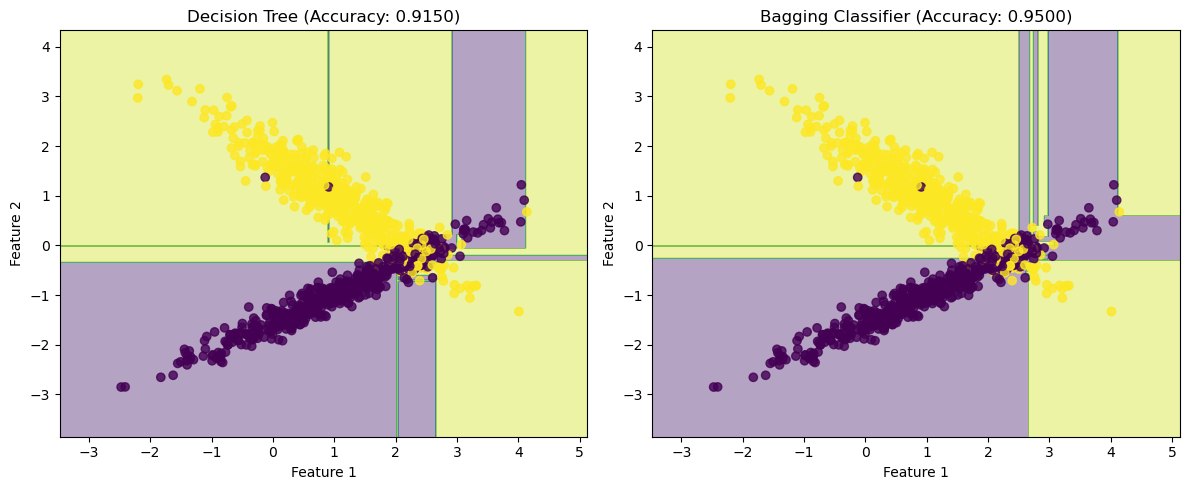

In [5]:
# Generate a classification dataset
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate a single Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

# Train and evaluate Bagging Classifier
bc = BaggingClassifier(n_estimators=10, max_samples=0.8)
bc.fit(X_train, y_train)
bc_pred = bc.predict(X_test)
bc_accuracy = accuracy_score(y_test, bc_pred)

print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Bagging Classifier Accuracy: {bc_accuracy:.4f}")

# Visualize decision boundaries
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

plt.figure(figsize=(12, 5))
plt.subplot(121)
plot_decision_boundary(dt, X, y, f'Decision Tree (Accuracy: {dt_accuracy:.4f})')
plt.subplot(122)
plot_decision_boundary(bc, X, y, f'Bagging Classifier (Accuracy: {bc_accuracy:.4f})')
plt.tight_layout()
plt.show()

## Regression Example

Decision Tree MSE: 231.5426
Bagging Regressor MSE: 160.4308


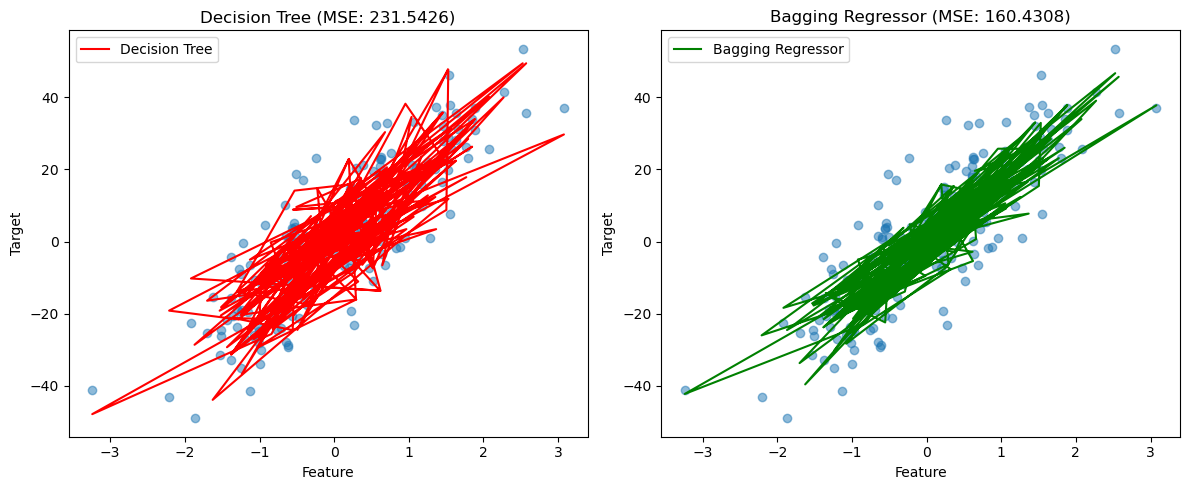

In [6]:
# Generate a regression dataset
X, y = make_regression(n_samples=1000, n_features=1, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate a single Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)

# Train and evaluate Bagging Regressor
br = BaggingRegressor(n_estimators=10, max_samples=0.8)
br.fit(X_train, y_train)
br_pred = br.predict(X_test)
br_mse = mean_squared_error(y_test, br_pred)

print(f"Decision Tree MSE: {dt_mse:.4f}")
print(f"Bagging Regressor MSE: {br_mse:.4f}")

# Visualize regression results
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.scatter(X_test, y_test, alpha=0.5)
plt.plot(X_test, dt_pred, color='r', label='Decision Tree')
plt.title(f'Decision Tree (MSE: {dt_mse:.4f})')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

plt.subplot(122)
plt.scatter(X_test, y_test, alpha=0.5)
plt.plot(X_test, br_pred, color='g', label='Bagging Regressor')
plt.title(f'Bagging Regressor (MSE: {br_mse:.4f})')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

plt.tight_layout()
plt.show()

## Conclusion

This notebook demonstrated the effectiveness of our custom Bagging implementation for both classification and regression tasks. The visualizations illustrate how Bagging can create smoother decision boundaries in classification and more robust predictions in regression compared to a single decision tree. This often leads to improved performance and reduced overfitting.